#### Prerequisites
1. To follow along with the instructions in this chapter, you'll require a terminal.
2. Change your working directory by typing the following command: ```cd /p/project/training2308/$USER/```

# Overview
To facilitate your training using Python and TensorFlow, it's essential to set up an environment that can be uniformly accessed across various nodes. In this guide, we'll employ Miniconda for the creation of a Python virtual environment dedicated to your experiments.

# Foundation Models

Foundation models represent a significant change in the realm of deep learning. Unlike traditional methods that train models using labeled datasets, foundation models leverage extensive volumes of broad, unlabeled data. Pretraining these models on sizable datasets facilitates faster adaptation to downstream tasks with less labeled data. This is particularly beneficial when dealing with remote sensing data, where labeled datasets are rare and costly to acquire.

# ![image.png](images/dlvsfm.png)
Figure 1. A depiction of a foundation model pre-trained on a large unlabeled dataset. The model is subsequently fine-tuned for a specific downstream task using a smaller labeled dataset.

## Transformers
The renowned transformer model architecture is currently the cornerstone for foundation models. It's a type of neural network architecture that employs attention mechanisms (as seen in Fig. 2) to comprehend contextual relationships between different parts of the input. Transformers have demonstrated great effectiveness in diverse tasks such as language translation, text summarization, and image captioning, within the NLP domain.

![image.png](images/attention.webp)
Figure 2. Fundamental transformer architecture. The attention mechanism enables the model to understand contextual relationships between inputs.

## Vision Transformers
In the realm of computer vision, Convolutional Neural Networks (CNNs) have been the preferred architecture for many years, primarily due to their efficiency and ability to emulate the visual cortex. However, with the success of transformers in the Natural Language Processing (NLP) domain (including BERT, BART, GPT, LLaMa), Vision Transformers (ViTs) have been introduced as a novel architecture for computer vision tasks, with performance on-par or exceeding CNNs. Here, images are viewed as sequences of image patches. Feature maps are modeled as vectors of tokens, each token representing an embedding of a specific image patch. ViTs have an edge over CNNs because they are less subject to the inductive biases that CNNs face (like assumptions of locality and weight sharing). Moreover, ViTs possess a larger global receptive field (the ability to 'attend' to the entire image simultaneously). One disadvantage of ViTs is their computational expense for training, requiring substantial compute and memory resources. CNNs, on the other hand, benefit from years of operator and library optimization, making them more efficient to train.

![image.png](images/vit.png)
Figure 3. ViT architecture. The image is divided into patches and flattened into a sequence of tokens. These tokens are then fed into a transformer encoder.

## Pretraining Vision Transformers

The pretraining of transformers helps the model learn how to extract features from unlabeled data. This process generally employs two main strategies: self-supervised contrastive learning (CL) and Masked Image Modeling (MIM). CL typically involves augmenting an image and minimizing the distance between the augmented image and the original image in the embedding space. Conversely, MIM involves masking a portion of the image and predicting the masked section. The pretraining process is illustrated in Fig. 4.

![image.png](images/mim.png)
Figure 4. The Masked Image Modeling pretraining process. The image is divided into patches and flattened into a sequence of tokens. A segment of the tokens is masked, and the model is trained to predict the full image, including the masked tokens.



## A geospatial foundation model for Harmonized Landsat Sentinel-2 (HLS) data

The NASA-IMPACT, in partnership with IBM developed a Foundation model based on Harmonized Landsat Sentinel-2 (HLS) data. HLS is a global, harmonized surface reflectance product derived from Landsat 8 and Sentinel-2 data. The HLS Foundation Model is a ViT based model pre-trained on HLS data. The model is trained using the MIM pretraining strategy. The model is trained on 30m resolution HLS data and can be fine-tuned for downstream tasks such as land cover classification, change detection, object detection and segmentation. The HLS FM architecture is illustrated in Fig. 5.

![image.png](images/hls_fm.png)
Figure 5. The HLS Foundation Model architecture.

### Model Details:
```
Temporal Range -US for the year of 2017 
Spectral bands - 6 (Blue, Green, Red, NIRnarrow, SWIR1, SWIR2)
Model size  - 100 million parameters
```


# Notes on Fine-tuning

Fine-tuning Vision Foundation Models:

Once a vision foundation model, like a Vision Transformer (ViT), has been pretrained on a large, unlabeled dataset, it's ready to be fine-tuned for specific tasks. Fine-tuning is a procedure that tailors a pretrained model to work on a particular task with a smaller labeled dataset. This process allows us to leverage the knowledge gained by the model during pretraining and adjust it to many tasks. Here's how it generally works:

1. **Task-Specific Dataset Preparation**: First step requires compilation of labeled dataset for a specific task on interest. This dataset is typically smaller than what is required for training a model from scratch, but needs to be similar in signature to the original pretraining dataset. It could be a collection of images labeled with classes for object recognition, bounding boxes for object detection, or any other labeling that corresponds to the specific vision task.

2. **Initialize with Pretrained Weights**: We begin by initializing your vision transformer model with the weights learned during pretraining. This is the primary difference between training a model from scratch and fine-tuning - instead of starting with random weight initialization, we are starting with weights that already have some representation of the data.

3. **Model Adjustment by Fine Tuning**: During the fine-tuning process, the weights of the pretrained model are adjusted using backpropagation and gradient descent, as with normal training. However, since the model is already close to the optimal solution, the updates made to the weights during training are typically quite small. The simplest approach is to fine-tune all the layers of the model. However, we can also choose to freeze (or hold constant) the earlier layers of the model (which often capture more generic features), and only fine-tune some of the later layers (which capture more task-specific features). You can also add one or more fully-connected layers at the end of the model and only train these layers on the new data. Typically very small learning rate is employed to preserve the original weights (this is a problem known as catastrophic forgetting) and avoid overfitting.

4. **Evaluation and Iteration**: Finally, the fine-tuned model is evaluated on a separate test set to measure its performance. 
By leveraging pre-trained models, we are able to reduce the amount of labeled data required to train a model for a specific task. This is particularly useful in the remote sensing domain, where labeled datasets are often scarce and costly to acquire. We also spend less time and effort in training the model due to pre-emptive compute. 

## MMSegmentation

We use the popular segmentation library, [MMSegmentation](https://github.com/open-mmlab/mmsegmentation) for finetuning our Vision transformer. MMSegmentation is a part of the [OpenMMLab](https://github.com/open-mmlab) computer vision library. While the library supports various backbones and methods of segmentation, we particularly used ViT backbone with MAE masking strategy. For segmentation method, [U-Net](https://arxiv.org/abs/1505.04597) architecture was used.

## Conducting Training using High-Performance Computing and TensorFlow
Follow the linked steps below to effectively set up and conduct your training:

1. [Download Miniconda](#Download-Miniconda)
2. [Install Conda with the Downloaded Miniconda Script](#Install-Conda)
3. [Verify the Usability of Python within the Conda Environment](#Python-Usability)
4. [Formulate a Conda Environment utilizing the Supplied Yaml File](#Create-Conda-Environment)
5. [Install the Necessary Packages](#Install-Packages)
6. [Familiarize yourself with the Folder Structure and Files](#Folder-Structure-and-Files)
7. [Amend the Configuration for Training](#Update-Configuration)
8. [Modify the Batch_Job File](#Update-Batch_Job-File)
9. [Initiate the Job Submission](#Submit-Job)
10. [Keep Track of the Progress](#Monitor-Progress)
11. [Validate the Saved Model](#Test-Saved-Model)

## Utilizing Cloud Computing for Inference
To leverage the power of cloud computing for inference, follow the outlined steps:

1. [Transfer the Trained Model to an AWS Environment via boto3](#Push-Model-to-AWS)
2. [Access Configured Environments in SageMaker](#Access-SageMaker-Environments)
3. [Load your Model into SageMaker](#Load-Model-in-SageMaker)
4. [Execute Model Deployment](#Deploy-Model)
5. [Examine the Deployed Model](#Test-Deployed-Model)
6. [Establish an API Endpoint for Model Interaction](#Deploy-API-Endpoint)
7. [Engage with the API Endpoint to Extract Inferences from the Model](#Interact-with-API)

## Purge Previously loaded modules

In [ ]:
module purge

# Download Miniconda
In this step, we will download Miniconda, which we will use to create our Python virtual environment. You can download it from the following link: [Miniconda](https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh).

All of the following sections are to be performed in a terminal (from the jupyterhub). <Add details>

In [ ]:
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh

# Install Conda
After downloading Miniconda, we will install Conda. Use the script that you downloaded in the previous step to install Conda. We will walk through the steps of this process in this section.


In [ ]:
chmod 770 Miniconda3-latest-Linux-x86_64.sh
./Miniconda3-latest-Linux-x86_64.sh
# Where to install miniconda (after the installation, it will ask): `/p/project/training2206/$USER/miniconda3` 
# Do you wish the installer to Initialize miniconda3? Yes 

# Python Usability
In this section, we will verify that we can use Python from the Conda environment that we have set up. This involves testing our setup and ensuring that Python is properly installed and can be accessed from our environment.


### Check if the installation updated your bashrc to automatically use Python from conda

In [ ]:
cat ~/.bashrc

# Create Conda Environment
Next, we will create a new Conda environment for our project. This environment will isolate our project's dependencies from other Python projects on our machine. We will use a provided YAML file to define our environment.

You will use the Python from the conda environment to create a conda environment which will be used throughout.

In some cases, conda might not be activated after installation. You can just refresh your bash terminal using `exec bash`, and it should enable the conda environment for you.

Once in the conda environment, you can create a new Python virtual environment using `conda env create --name py39 -f /p/project/training2308/tutorial.yml`

Then you will use the environment you just created using `conda activate py39`

# Install Packages
Once the environment is activated, you will need to make sure you are starting from scratch. To make sure no other modules are installed, use `module purge` to remove all the unwanted modules.

For the purposes of this tutorial all packages except mmcv, mmcv-full, and mmsegmentation are already prepared via the tutorial.yml file.

We will need to install the aforementioned files as follows:
```
mim install mmcv==1.5.0
mim install mmcv-full==1.5.0
mim install mmsegmentation==0.30.0
```
Once these are installed, local version of mmsegmentation also needs to be installed:
`cd mmsegmentation`
`pip install -e .`
`cd ..`

We also need boto3 for the models to be transfered to cloud environment.
`pip install boto3`

All of the required packages are now installed.


# Folder Structure and Files
Now, let's go over the structure of our project. We'll discuss the organization of our project files and folders, which will include our training scripts, configuration files, and more.

All of the project-related files are located at `/p/project/training2308/$USER/`. (User is the environment variable with your user name. You can check what it is set as using `echo $USER`)

Change directory to the aforementioned directory.

Check for `2023-igarss-tutorial` folder in the directory. If it is not present, you can use Git to download it from https://github.com/nasa-impact/2023-igarss-tutorial using `git clone https://github.com/nasa-impact/pixel-detector.git` or using the jupyterhub.

Once cloned, change the directory to the 2023-igarss-tutorial folder using `cd 2023-igarss-tutorial`

Below is the folder structure for the code:
```
|> chapter-1
    |> mmsegmentation
        |> config: `Contains configuration files`
        |> burn_scars.sh `Bash file for Burn Scars Training job submission.`
        |> flood.sh `Bash file for Flood Training job submission.`
    ...
|> chapter-2 `Contains files for loading the files in sagemaker environment and inferencing.`
|> chapter-3 `Contains files for establishing an API in cloud environment to interact with the trained model`
```

# Update Configuration
Before we can start training, we need to update our configuration. This could include setting the paths to our training and validation datasets, setting our learning rate, and other hyperparameters.

To find your user name, run the following command in the terminal:

`echo $USER`

Training and validation files are located at `/p/project/training2308/data/burn_scars` and `/p/project/training2308/data/flood`.

Before we start working on any of this, we will change our directory to `/p/project/training2206/$USER/2023-igarss-tutorial/chapter-1`

In the jupyter lab interface, find `chapter-1/burn_scars.sh` or `chapter-1/flood.sh` file. Right click on either of them in the left pane, and select `editor`. Once the file is open, you can update the `<username>` instances with your `username`.


# Update Batch_Job File
In the `burn_scars.sh` or `flood.sh` file you can specify the number of nodes you want to use for training. As an example, you are going to use 2 nodes for training.

Check details of the training job:

`cat /p/project/training2206/$USER/2023-igarss-tutorial/chapter-1/burn_scars.sh`


# Submit Job
You can submit the training job using the `sbatch` command. Like so: `sbatch burn_scars.sh` or `sbatch flood.sh`

Once submitted, two new files will be created by the process: `output.out` and `error.err`. `output.out` will contain details of the output from your processes, and `error.err` will provide details on any errors or logs from the scripts. Once the job is submitted and the files are created, you can check for updates simply by using `tail -f output.out error.err`. (Any warnings, automated messages, and errors are tracked in the `error.err` file while only the [ed. note: incomplete sentence]

You can see how good or bad the model training is by watching the loss outputs in `output.out` or `error.err`.


# Monitor Progress
Once our job is submitted, we need to monitor its progress. We can do this by checking the output logs from our job, as well as any job status information provided by the HPC cluster.


# Test Saved Model
After our training job is completed, we will test the saved model to ensure that it is working correctly. This will involve loading the model from the saved file and running it on some test data.


# Push Model to AWS
After the model is finished training, the model is stored in the location specified in your config file `/p/project/training2308/<username>/<experiment>/training/latest.pth`, where `<username>` is your `username` and `experiment` is one of `burn_scars` or `flood`. You will be compressing this model and pushing it to an S3 bucket using `boto3` and the credentials from the AWS account shared with you.

## Compress file
- We will first change the name of the file to a consistent convention.         
```cp /p/project/training2308/<username>/<experiment>/Experiment_<timestamp>/training/latest.pth /p/project/training2308/<username>/<username>_<experiment>.pth```

- We will use `tar` to compress the file: 
```tar -czvf /p/project/training2308/<username>/<username>_<experiment>.tar.gz /p/project/training2308/<username>/<username>_<experiment>.pth```


## Get AWS credentials
Account creation links should have been shared with you. Once the account is setup, you can obtain the credentials required for upload from the AWS SSO homepage.
Please follow the steps listed below:

1. Navigate to https://nasa-impact.awsapps.com/start
2. Login
3. Click on `AWS Account`
4. Click on `Summer School`
5. Click on `Command line or Programmatic access`
6. Copy the `AWS Access Key Id`, `AWS Secret Access Key`, and `AWS session token` from the pop up
7. Update the following script and run it in a python shell. (You can start a python shell by just typing `python` in the terminal).

This will upload the files directly into the S3 bucket. You will then fetch the file from S3 bucket into the SageMaker notebook from where you will be deploying the model and hosting an API to interact with the model.


*Note: Please make sure the virtual environment is active while working with the python shell.


In [ ]:
import boto3
import os

AWS_ACCESS_KEY_ID = "<Copied over from SSO login>"
AWS_SECRET_ACCESS_KEY = "<Copied over from SSO login>"
AWS_SESSION_TOKEN = "<Copied over from SSO login>"

BUCKET_NAME = "2023-igarss-tutorial-store"
## Please update this with either burn_scars or flood
EXPERIMENT = "<experiment_name>"

USER = os.environ.get("USER")


def generate_federated_session():
    """
    Method to generate federated session to upload the file from HPC to S3 bucket.
    ARGs:
        filename: Upload filename
    Returns:
        Signed URL for file upload
    """
    return boto3.session.Session(
        aws_access_key_id=AWS_ACCESS_KEY_ID,
        aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
        aws_session_token=AWS_SESSION_TOKEN,
    )


model_filename = f"{USER}/{USER}_{EXPERIMENT}.tar.gz"
model_path = f"/p/project/training2308/{model_filename}"
session = generate_federated_session()
s3_connector = session.client("s3")

s3_connector.upload_file(model_path, BUCKET_NAME, f"{USER}_{EXPERIMENT}.tar.gz")

Once the process is done, you can check for the files in S3 using the AWS console.

1. Navigate to https://nasa-impact.awsapps.com/start
2. Login
3. Click on `AWS Account`
4. Click on `Summer School`
5. Click on `Management Console`
6. In the search bar, search for `s3`
7. Click on `s3`
8. Click on `2023-igarss-tutorial-data`
9. Click on your `username`

You should be able to view your file there now. 

# Access SageMaker Environments
Next, we will access our pre-configured environments in Amazon SageMaker. We will use these environments to load and run our model in the cloud.


# Load Model in SageMaker
In this section, we will load our model into SageMaker. This involves transferring our model file to a location that SageMaker can access, and then telling SageMaker to load the model.


# Deploy Model
Once our model is loaded in SageMaker, we can deploy it. This will make our model available for inference requests.


# Test Deployed Model
After deploying our model, we will test it to ensure it is working correctly. This involves sending some test requests to our deployed model and checking the results.


# Deploy API Endpoint
Next, we will deploy an API endpoint that we can use to interact with our model. This API will allow us to send requests to our model and receive the model's predictions in response.


# Interact with API
In the final section, we will interact with our deployed API endpoint. We will send some test requests to the API and display the inferences made by our model.


## read error.er and get the loss graph


In [ ]:
import numpy as np

losses = []
with open("error.er", "r") as f:
    for line in f:
        # example: 2023-07-16 02:36:16,763 - mmseg - INFO - Epoch(val) [199][15]   decode.loss_dice: 0.3251, decode.acc_seg: 81.1551, aux.loss_dice: 0.3215, aux.acc_seg: 81.4646, loss: 0.6466
        if "Epoch(val) " in line:
            loss = float(line.split("loss: ")[1].strip())
            losses.append(loss)
losses = losses[::2]

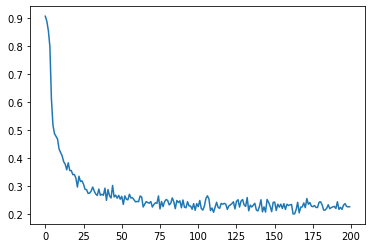

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(losses)), losses)